Caixeiro com gasolina infinita
========================================



## Introdução



Muito semelhante ao experimento A.06, contudo, ao invez de ser um problema de minimização, este é de maximização, já que o caixeiro viajante é contra as políticas ambientais, e sembre busca a maior distãncia entre as cidades, seguindo um caminho que consome muita gasolina. 



## Objetivo



Encontrar o caminho de *maior* distância no problema do caixeiro viajante e mostrar ele de forma gráfica.

**Considerações do experimento**: Considere um número $n\geq7$ de coordenadas $(x,y)$ de cidades e que o caixeiro tenha combustível infinito. Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma vez.



## Importações



Todos os comandos de `import` devem estar dentro desta seção.



In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from itertools import permutations

import graphviz
from collections import deque

from funcoes import cria_cidades

from funcoes import populacao_inicial_cv as cria_populacao_inicial
from funcoes import funcao_objetivo_pop_cv
from funcoes import selecao_torneio_max 
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao

from funcoes import funcao_objetivo_cv_gasolina_inf as funcao_objetivo_individuo 

from time import perf_counter as pf

## Códigos e discussão



In [2]:
### CONSTANTES

# relacionadas à busca 
# Os seguintes valores são exatamente os mesmos usados no experimento do caixeiro viajante. 
TAMANHO_POP = 50
NUM_GERACOES = 1000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3

# relacionadas ao problema a ser resolvido
NUMERO_DE_CIDADES = 7 # Apenas o número de cidades que muda para cumprir com os objetivos do experimento
CIDADES = cria_cidades(NUMERO_DE_CIDADES)


In [3]:
# Funções locais

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_selecao(populacao, fitness):
    return selecao_torneio_max(populacao, fitness, NUM_COMBATENTES_NO_TORNEIO)

Abaixo temos o mesmo código usado no experimento A.06

In [4]:
# Busca por algoritmo genético

start_algoritmo = pf()

populacao = cria_populacao_inicial(TAMANHO_POP, CIDADES)

melhor_fitness_ja_visto = -float("inf")

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness    
    
fim_algoritmo = pf()

Para comprovar que o método usando de busca por algoritmo genético resulta no melhor resultado possível, então, realizamos uma busca por exaustão para ter a certeza de que os resultados são condizentes, já que todos os caminhos serão analisados.

In [5]:
# Busca testando todas as permutações

melhor_fitness_exaustao = -float("inf")

inicio_all = pf()

# testando todas as permutações possíveis
for caminho in permutations(list(CIDADES.keys())):
    caminho = list(caminho)
    distancia = funcao_objetivo_individuo(caminho, CIDADES)
    if distancia > melhor_fitness_exaustao:
        melhor_fitness_exaustao = distancia
        melhor_resposta_exaustao = caminho

fim_all = pf()

In [6]:
# Checando os resultados

print()
print("Melhor caminho das cidades obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com a distância de:", melhor_fitness_ja_visto, f'em {fim_algoritmo-start_algoritmo} segundos')

print()
print("Melhor caminho das cidades obtido por busca exaustiva:")
print(melhor_resposta_exaustao, "com a distância de:", melhor_fitness_exaustao, f'em {fim_all-inicio_all} segundos')


Melhor caminho das cidades obtido por algoritmos genéticos:
['Cidade 4', 'Cidade 0', 'Cidade 3', 'Cidade 2', 'Cidade 5', 'Cidade 6', 'Cidade 1'] com a distância de: 3.2848248075986763 em 0.5159637000000004 segundos

Melhor caminho das cidades obtido por busca exaustiva:
['Cidade 3', 'Cidade 0', 'Cidade 4', 'Cidade 2', 'Cidade 5', 'Cidade 6', 'Cidade 1'] com a distância de: 3.2848248075986763 em 0.02067850000000071 segundos


É retornado o caminho das cidades, e conforme os objetivos, nenhuma cidade foi repetida. Além disso, por meio da função objetivo temos o desejado, junto da seleção, esta que busca uma maximização dada pela `selecao_torneio_max`. Então é possível visualizar que os resultados são condizentes, haja vista que a sistancia de ambos os métodos são iguais e junto a eles temos o dempo que o código demorou para processar. Uma observação importante é que de forma um pouco contra intuitiva, o método de exaustão foi mais rápido do que o de algoritmo genético, e isso se dá pela quantidade de cidades do problema, onde o número de possíbilidades vai aumentando de forma fatorial, assim, também foi realizado usando `NUMERO_DE_CIDADES` = 10 e o tempo obtido foi cerca de 100 segundos.

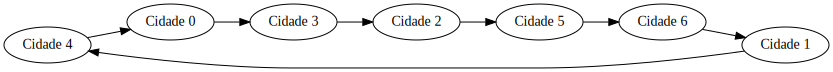

In [7]:
# OBS: Essa forma de plotar o gráfico do caminho percorrido, foi feito com a ajuda do João Pedro, aluno da Ilum, a referência não está nesse notebook, já que não foi retirada de outro meio.

Caminho_das_cidades_algoritmos_genéticos = graphviz.Digraph(format='svg', graph_attr={'rankdir': 'LR'})

for node in melhor_individuo_ja_visto:
    Caminho_das_cidades_algoritmos_genéticos.node(node, node)

individuo_copy = deque(melhor_individuo_ja_visto)
individuo_copy.rotate(-1)
    
for ini, che in zip(melhor_individuo_ja_visto, individuo_copy):
    Caminho_das_cidades_algoritmos_genéticos.edge(ini, che)

Caminho_das_cidades_algoritmos_genéticos

Assim mostrando de forma gráfica, por meio de um grafo como foi o caminho percorrido e condizendo com osdados do código anterior.

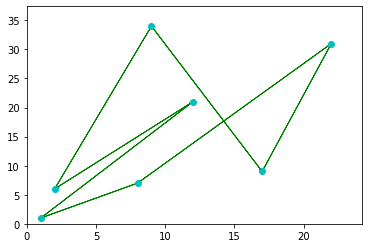

In [8]:
def plotTSP(path, points, num_iters=1):

    """
    path: List of lists with the different orders in which the nodes are visited
    points: coordinates for the different nodes
    num_iters: number of paths that are in the path list
    
    """

    # Unpack the primary TSP path and transform it into a list of ordered 
    # coordinates

    x = []; y = []
    for i in paths[0]:
        x.append(points[i][0])
        y.append(points[i][1])
    
    plt.plot(x, y, 'co')

    # Set a scale for the arrow heads (there should be a reasonable default for this, WTF?)
    a_scale = float(max(x))/float(100)

    # Draw the older paths, if provided
    if num_iters > 1:

        for i in range(1, num_iters):

            # Transform the old paths into a list of coordinates
            xi = []; yi = [];
            for j in paths[i]:
                xi.append(points[j][0])
                yi.append(points[j][1])

            plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]), 
                    head_width = a_scale, color = 'r', 
                    length_includes_head = True, ls = 'dashed',
                    width = 0.001/float(num_iters))
            for i in range(0, len(x) - 1):
                plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                        head_width = a_scale, color = 'r', length_includes_head = True,
                        ls = 'dashed', width = 0.001/float(num_iters))

    # Draw the primary path for the TSP problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, 
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

    #Set axis too slitghtly larger than the set of x and y
    plt.xlim(0, max(x)*1.1)
    plt.ylim(0, max(y)*1.1)
    plt.show()


if __name__ == '__main__':
    # Run an example
    
    # Create a randomn list of coordinates, pack them into a list
    x_cor = [1, 12, 2, 9, 17, 22, 8]
    y_cor = [1, 21, 6, 34, 9, 31, 7]
    points = []
    for i in range(0, len(x_cor)):
        points.append((x_cor[i], y_cor[i]))

    # Create two paths, teh second with two values swapped to simulate a 2-OPT
    # Local Search operation
    path0 = [0, 1, 2, 3, 4, 5, 6]
    path1 = [0, 2, 1, 3, 4, 5, 6]
    path2 = [0, 2, 1, 3, 6, 5, 4]
    path3 = [0, 2, 1, 3, 6, 4, 5]
    path4 = [0, 2, 1, 3, 6, 4, 5]
    path5 = [0, 2, 1, 3, 6, 4, 5]
    path6 = [0, 2, 1, 3, 6, 4, 8]

    # Pack the paths into a list
    paths = [path0, path1, path2, path3, path4, path5, path6]
    
    # Run the function
    plotTSP(paths, points, 1)

Código usado da sehuinte fonte [2]. Preferi não alterar as docstrings e manter a original do autor, assim mudando apenas os valores usados para obter um gráfico desejado com as cordenadas (x,y).

### Curiosidade:

Achei bem interessante o seguinte Gif [1], que apresenta todos os caminhos em uma busca por exaustão, onde o sistema possui 7 cidades, assim como no exemplo realizado nesse experimento. Além disso, nota-se que úmero de permutações é: (7−1)!/2 = 360. 

<center>
<img src='./TSP_Gif.gif' style="width:900px;height:400px"/>
</center>

## Observações

Esse é o segundo experimento que estou realizando da lista de experimentos de **Algoritmos Géneticos**.

## Conclusão



O objetivo do **experimento GA.03** é encontrar a solução para o problema do caixeiro viajante com gasolina infinita e mostrar seu caminho de maneira gráfica. 
Desse modo, diferente do **experimento A.06** onde era de minimização, este é de maximização e para isso, funções como `selecao_torneio_max` foram utilizadas para que fosse possível encontrar a solução do problema. Assim, usando algoritmos genéticos para encontrar a maior distância possível.

Em relação ao resultado obtido, pode-se afirmar que o objetivo foi alcançado, já que o valor por meio do método de algoritmos genéticos corresponde ao valor com busca exaustiva, este que analisou todas as 360 possibilidades, onde o desempenho apresentado foi bem significativo para um número $n\geq7$, principalmente com valores maiores, como foi o caso de dez cidades, assim, com o algoritmo genético demorando menos de 1 segundo e a busca exaustiva mais de 100 segundos. Por fim, para demonstrar o resultado foi feito um grafo que demonstra o caminho percorrido, sem repetir nenhuma cidade e retornando para a inicial, além disso, também foi feito um gráfico em coordenadas (x,y) para que fosse notável essa distância entre os pontos. Dessa maneira, por meio dos resultados demonstrados é evidente que o caminho percorrido foi o de maior distância e o que mais poluiu, causando prejuízos ao ambiente.

## Referências consultadas

[1] https://en.wikipedia.org/wiki/Travelling_salesman_problem#/media/File:Bruteforce.gif

[2] https://gist.github.com/payoung/6087046

## Playground



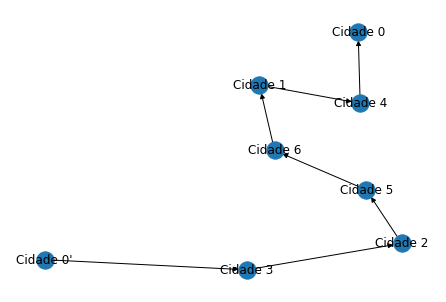

In [10]:
Cidades_visitadas_pelo_caixeiro_viajante_com_gasolina_infinita = {
    "Cidade 0'": {"Cidade 3"},
    "Cidade 1": {"Cidade 4"},
    "Cidade 2": {"Cidade 5"},
    "Cidade 3": {"Cidade 2"},
    "Cidade 4": {"Cidade 0"},
    "Cidade 5": {"Cidade 6"},
    "Cidade 6": {"Cidade 1"},
}

g = nx.DiGraph(Cidades_visitadas_pelo_caixeiro_viajante_com_gasolina_infinita)

nx.draw(g, with_labels=True)

